In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('Mall_Customers.csv')
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
#X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X = data.iloc[:,[3,4]].values

In [29]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<Axes: >

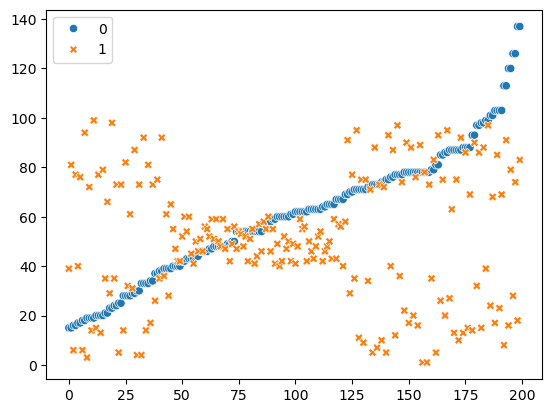

In [31]:
sns.scatterplot(X)

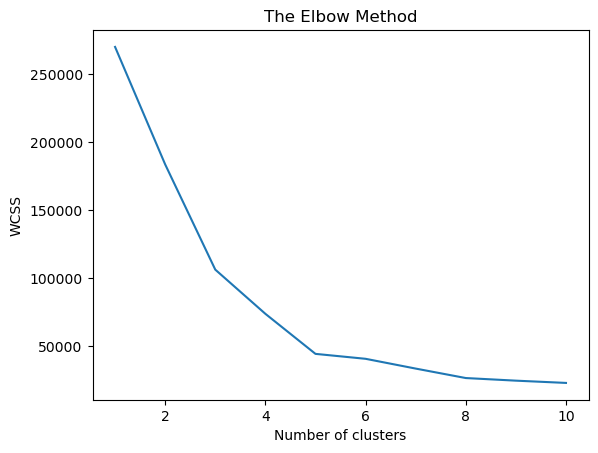

In [35]:
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++', random_state=42)
    kmeans.fit(X)
    list1.append(kmeans.inertia_)
plt.plot(range(1,11),list1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

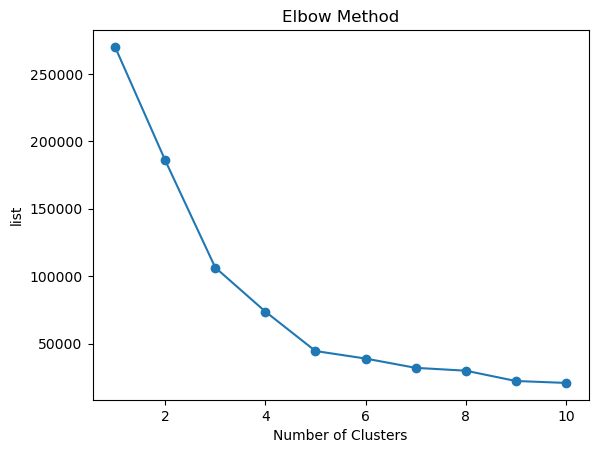

In [39]:
list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    list.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), list, marker='o') # range(1,11)-x axis,list-y axis
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("list")
plt.show()


In [21]:
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)


In [49]:
data.Cluster.value_counts()

Cluster
0    81
1    39
2    35
3    23
4    22
Name: count, dtype: int64

In [51]:
# To get the centroids:
centroids = kmeans.cluster_centers_
centroids

array([[ 62.23404255,  47.55319149],
       [ 77.58823529,  88.52941176],
       [ 79.70833333,  14.29166667],
       [ 28.18181818,  33.27272727],
       [ 25.0952381 ,  80.04761905],
       [124.        ,  81.75      ],
       [ 46.38888889,  52.13888889],
       [ 24.58333333,   9.58333333],
       [109.7       ,  22.        ],
       [ 86.66666667,  76.16666667]])

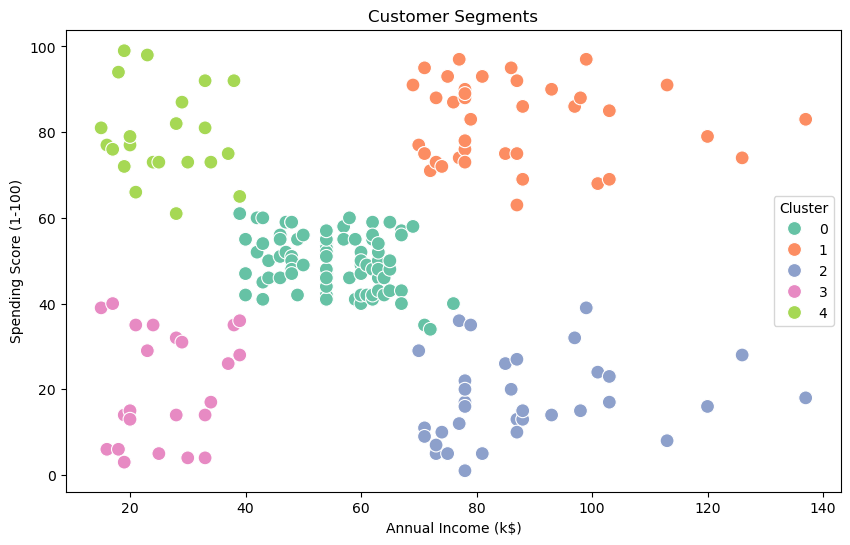

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments")
plt.show()
